<a href="https://colab.research.google.com/github/ttk66/rps/blob/main/Riiid_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
# Загрузим данные с диска
from google.colab import drive
drive.mount('/content/drive')

# Путь к файлу на Google Drive
file_path = '/content/drive/My Drive/data_analysis_hw/train-001.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import pandas as pd
# Для уменьшения объема выделяемой памяти преопределим типы данных для элементов train-001.csv
dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32",
    "prior_question_had_explanation": "boolean"
}
# Загрузка данных из CSV файлов. Ограничимся миллионом строк в train, поскольку в противном случае файл не обрабатывается
train = pd.read_csv('/content/drive/MyDrive/data_analysis_hw/train-001.csv', nrows = 1000000, dtype=dtypes)
lectures = pd.read_csv('/content/drive/MyDrive/data_analysis_hw/lectures.csv')
questions = pd.read_csv('/content/drive/MyDrive/data_analysis_hw/questions.csv')

In [104]:
# Печать первых 5 строк для каждого файла
print(train.head(5))
print(lectures.head(5))
print(questions.head(5))

# Просмотр информации о типах данных и наличия пропусков
print(train.info())
print(lectures.info())
print(questions.info())

   row_id  timestamp  user_id  content_id  content_type_id  task_container_id  \
0       0          0      115        5692            False                  1   
1       1      56943      115        5716            False                  2   
2       2     118363      115         128            False                  0   
3       3     131167      115        7860            False                  3   
4       4     137965      115        7922            False                  4   

   user_answer  answered_correctly  prior_question_elapsed_time  \
0            3                   1                          NaN   
1            2                   1                      37000.0   
2            0                   1                      55000.0   
3            0                   1                      19000.0   
4            1                   1                      11000.0   

   prior_question_had_explanation  
0                            <NA>  
1                           False  
2 

In [105]:
# Заменяем пропуски в prior_question_elapsed_time медианой
train['prior_question_elapsed_time'].fillna(train['prior_question_elapsed_time'].median(), inplace=True)
# Заменяем пропуски в prior_question_had_explanation на False
train['prior_question_had_explanation'].fillna(False, inplace=True)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int32  
 3   content_id                      1000000 non-null  int16  
 4   content_type_id                 1000000 non-null  boolean
 5   task_container_id               1000000 non-null  int16  
 6   user_answer                     1000000 non-null  int8   
 7   answered_correctly              1000000 non-null  int8   
 8   prior_question_elapsed_time     1000000 non-null  float32
 9   prior_question_had_explanation  1000000 non-null  boolean
dtypes: boolean(2), float32(1), int16(2), int32(1), int64(2), int8(2)
memory usage: 32.4 MB
None


<ipython-input-105-ecc2dffdfade>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['prior_question_elapsed_time'].fillna(train['prior_question_elapsed_time'].median(), inplace=True)
<ipython-input-105-ecc2dffdfade>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [106]:
# Заменяем пропуски в type_of на "Неизвестно"
lectures['type_of'].fillna('Неизвестно', inplace=True)
# Заменяем пропуски в tag на "Нет тега"
lectures['tag'].fillna('Нет тега', inplace=True)
print(lectures.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB
None


<ipython-input-106-47604e0c9b16>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lectures['type_of'].fillna('Неизвестно', inplace=True)
<ipython-input-106-47604e0c9b16>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [107]:
# Заменяем пропуски в correct_answer на наиболее частый ответ (модальный)
questions['correct_answer'].fillna(questions['correct_answer'].mode()[0], inplace=True)
# Заменяем пропуски в tags на "Без тега"
questions['tags'].fillna('Без тега', inplace=True)
print(questions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13523 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB
None


<ipython-input-107-864834885151>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  questions['correct_answer'].fillna(questions['correct_answer'].mode()[0], inplace=True)
<ipython-input-107-864834885151>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

In [108]:
# Проверяем наличие пропусков после замены
print(train.isnull().sum())
print(lectures.isnull().sum())
print(questions.isnull().sum())

row_id                            0
timestamp                         0
user_id                           0
content_id                        0
content_type_id                   0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_elapsed_time       0
prior_question_had_explanation    0
dtype: int64
lecture_id    0
tag           0
part          0
type_of       0
dtype: int64
question_id       0
bundle_id         0
correct_answer    0
part              0
tags              0
dtype: int64


In [109]:
# Фильтрация данных по типу контента (вопросы и лекции)
questions_data = train[train['content_type_id'] == 0]
lectures_data = train[train['content_type_id'] == 1]

# Анализ частоты правильных ответов на вопросы
correct_answer_rate = questions_data['answered_correctly'].mean()
print(f"Средняя точность ответов на вопросы: {correct_answer_rate:.2f}")

# Анализ времени, затраченного на ответы до и после лекций
# Посмотрим, как меняется время после просмотра лекций
time_before_lecture = questions_data[questions_data['user_answer'] != -1]['prior_question_elapsed_time'].mean()
time_after_lecture = lectures_data['prior_question_elapsed_time'].mean()

print(f"Среднее время до лекции: {time_before_lecture:.2f} мс")
print(f"Среднее время после лекции: {time_after_lecture:.2f} мс")

Средняя точность ответов на вопросы: 0.65
Среднее время до лекции: 25286.21 мс
Среднее время после лекции: 21000.00 мс


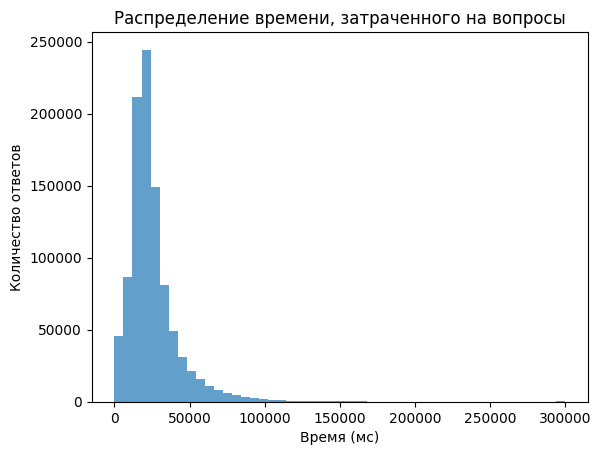

In [110]:
# Анализ времени, затраченного на выполнение вопросов
time_spent_on_questions = questions_data['prior_question_elapsed_time'].dropna()

# Построим гистограмму распределения времени
import matplotlib.pyplot as plt
plt.hist(time_spent_on_questions, bins=50, alpha=0.7)
plt.title("Распределение времени, затраченного на вопросы")
plt.xlabel("Время (мс)")
plt.ylabel("Количество ответов")
plt.show()

In [111]:
# Сравниваем точность ответов в зависимости от наличия объяснений
answered_with_explanation = questions_data[questions_data['prior_question_had_explanation'] == True]
answered_without_explanation = questions_data[questions_data['prior_question_had_explanation'] == False]

accuracy_with_explanation = answered_with_explanation['answered_correctly'].mean()
accuracy_without_explanation = answered_without_explanation['answered_correctly'].mean()

print(f"Точность с объяснением: {accuracy_with_explanation:.2f}")
print(f"Точность без объяснения: {accuracy_without_explanation:.2f}")

Точность с объяснением: 0.67
Точность без объяснения: 0.50


In [112]:
# Создаем объедененную бд для анализа вопросов
merged_data = pd.merge(train[train['content_type_id'] == 0], questions, left_on='content_id', right_on='question_id')
merged_data.head(50)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,0,0,115,5692,False,1,3,1,21000.0,False,5692,5692,3,5,151
1,1,56943,115,5716,False,2,2,1,37000.0,False,5716,5716,2,5,168
2,2,118363,115,128,False,0,0,1,55000.0,False,128,128,0,1,131 149 92
3,3,131167,115,7860,False,3,0,1,19000.0,False,7860,7860,0,1,131 104 81
4,4,137965,115,7922,False,4,1,1,11000.0,False,7922,7922,1,1,131 149 92
5,5,157063,115,156,False,5,2,1,5000.0,False,156,156,2,1,131 101 162 38
6,6,176092,115,51,False,6,0,1,17000.0,False,51,51,0,1,131 187 81
7,7,194190,115,50,False,7,3,1,17000.0,False,50,50,3,1,131 101 38
8,8,212463,115,7896,False,8,2,1,16000.0,False,7896,7896,2,1,131 104 162 81
9,9,230983,115,7863,False,9,0,1,16000.0,False,7863,7863,0,1,131 68 92


In [113]:
# Произведем анализ по тегам
tag_analysis = merged_data.groupby('tags')['prior_question_elapsed_time'].mean()
print(tag_analysis)

tags
1                       26479.980469
1 162                   32801.378906
10 111 92               24415.253906
10 164 102              21595.644531
10 164 162 29           21869.441406
                            ...     
98 97 21                41941.949219
98 97 35 117 122 162    42752.539062
98 97 35 146 122        45195.363281
98 97 46 135            50319.753906
98 97 77 135 162        46343.039062
Name: prior_question_elapsed_time, Length: 1501, dtype: float32


In [114]:
# Успеваемость по тегам
tags_accuracy = merged_data.groupby('tags')['answered_correctly'].mean()
print(tags_accuracy)

tags
1                       0.597663
1 162                   0.605299
10 111 92               0.898305
10 164 102              0.786982
10 164 162 29           0.900000
                          ...   
98 97 21                0.664804
98 97 35 117 122 162    0.682692
98 97 35 146 122        0.691176
98 97 46 135            0.668317
98 97 77 135 162        0.874214
Name: answered_correctly, Length: 1501, dtype: float64


In [115]:
# Произведем временной анализ по частям теста
part_analysis = merged_data.groupby('part')['prior_question_elapsed_time'].mean()
print(part_analysis)

part
1    22551.238281
2    18587.695312
3    23722.097656
4    23743.839844
5    25068.417969
6    32360.085938
7    45958.402344
Name: prior_question_elapsed_time, dtype: float32


In [116]:
# Успеваемость по частям теста (part)
part_accuracy = merged_data.groupby('part')['answered_correctly'].mean()
print(part_accuracy)

part
1    0.735834
2    0.707258
3    0.692096
4    0.620959
5    0.606321
6    0.650695
7    0.645141
Name: answered_correctly, dtype: float64


In [117]:
# Создаем группы пользователей по количеству правильных ответов
user_performance = questions_data.groupby('user_id')['answered_correctly'].mean()

# Разделим студентов на "хороших" и "плохих" по средней точности
good_students = user_performance[user_performance > 0.7]
poor_students = user_performance[user_performance <= 0.7]

print(f"Количество хороших студентов: {len(good_students)}")
print(f"Количество плохих студентов: {len(poor_students)}")

Количество хороших студентов: 653
Количество плохих студентов: 3171
